## Тема “Обучение без учителя”

Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [382]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [383]:
from sklearn.datasets import load_boston

In [384]:
boston_data = load_boston()

/home/ekaterina/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin

In [385]:
x = pd.DataFrame(data = boston_data.data, columns = boston_data.feature_names)
y = pd.DataFrame(data = boston_data.target, columns = ['price'])

In [386]:
from sklearn.model_selection import train_test_split

In [387]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size = 0.2, random_state = 42)

In [388]:
from sklearn.preprocessing import StandardScaler

In [389]:
scaler = StandardScaler()

In [390]:
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)

In [391]:
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)

In [392]:
from sklearn.manifold import TSNE

In [393]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

x_train_tsne = tsne.fit_transform(x_train_scaled)

/home/ekaterina/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


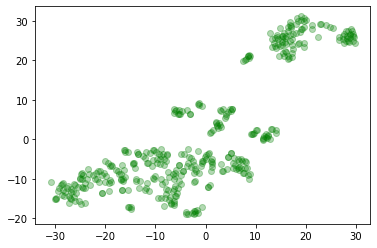

In [394]:
plt.scatter(x_train_tsne[:,0], x_train_tsne[:,1], color = 'green', alpha = 0.3)

Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [395]:
from sklearn.cluster import KMeans

In [396]:
km_model = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)

Обучим модель и предскажем разделение на кластеры по данным x_train_scaled (на нестандартизированных данных x_train результат хуже, разбиение на кластеры выглядит не очень эффективным, его рассматривать не будем, кроме того для tsne мы использовали стандартизированные данные).

In [407]:
train_lables = km_model.fit_predict(x_train_scaled)

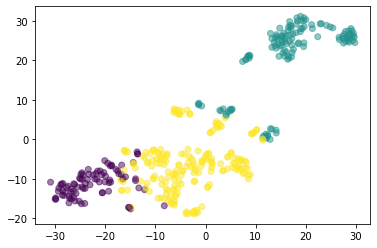

In [408]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=train_labels, alpha = 0.5)

In [411]:
for i in range(3):
    print('crim: ', 'cluster', i, ': ', x_train.loc[train_lables == i, 'CRIM'].mean())

crim:  cluster 0 :  0.07356558139534886
crim:  cluster 1 :  10.797028425196853
crim:  cluster 2 :  0.42166020942408367


In [412]:
for i in range(3):
    print('price: ', 'cluster', i, ': ', y_train.loc[train_lables == i]['price'].mean())

price:  cluster 0 :  27.788372093023252
price:  cluster 1 :  16.165354330708666
price:  cluster 2 :  24.958115183246072


Вывод: кластер 1 сильно отличается от кластеров 0 и 2, показатель криминальности существенно выше, чем в остальных, цена на недвижимость соответственно ниже. Кластеры 0 и 2 отличаются, но не так значительно, показатель криминальности в кластере 0 ниже, чем в кластере 2 в 6 раз, цена на недвижимость в кластере 0 выше, чем в кластере 2. Соответственно, кластер 0 самый менее криминальный, цены на недвижимость в нем самые высокие.

*Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [413]:
test_lables = km_model.predict(x_test_scaled)

In [417]:
for i in range(3):
    print('crim: ', 'cluster', i, ': ', x_test.loc[test_lables == i, 'CRIM'].mean())

crim:  cluster 0 :  0.062060000000000004
crim:  cluster 1 :  10.165531142857143
crim:  cluster 2 :  0.26607882352941176


In [418]:
for i in range(3):
    print('price: ', 'cluster', i, ': ', y_test.loc[test_lables == i]['price'].mean())

price:  cluster 0 :  31.35
price:  cluster 1 :  16.437142857142856
price:  cluster 2 :  21.860784313725492


Text(0, 0.5, 'price')

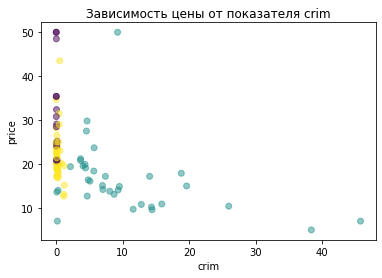

In [419]:
plt.scatter(x_test['CRIM'], y_test, c = test_lables, alpha = 0.5)
plt.title('Зависимость цены от показателя crim')
plt.xlabel('crim')
plt.ylabel('price')

Вывод: на тестовых данных мы получили явное разделение на кластеры (данные по цене взяли фактические по тестовой выборке, не предсказанные моделью). 0 кластер - самая высокая цена и самый низкий показатель crim, 1 кластер - самая низкая цена и самый высокий показатель crim. 2 кластер - по обоим показателям находится между 0 и 1, но его однозначно можно отдельно выделить.

Построим модель прогнозирования цен на недвижимость сначала в целом, без разделения на кластеры, а потом с учетом разделения на кластеры. сравним показатели mse, mae, R2

In [420]:
from sklearn.linear_model import LinearRegression

In [421]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [422]:
y_pred_all = model.predict(x_test_scaled)
y_pred_all = pd.DataFrame(y_pred_all, columns = ['price'])

In [423]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [424]:
def check_metrics(y_test, y_pred):
    return 'r2: ', r2_score(y_test, y_pred), 'mse: ', mean_squared_error(y_test, y_pred), 'mae: ',mean_absolute_error(y_test, y_pred)

In [425]:
check_metrics(y_test, y_pred_all)

('r2: ',
 0.6687594935356321,
 'mse: ',
 24.29111947497351,
 'mae: ',
 3.189091965887848)

Теперь спрогнозируем данные по цене отдельно по кластерам и оценим метрики отдельно по каждому кластеру.

Оценим результат прогноза по всем данным (прогноз по каждому кластеру делался отдельно)

Модель для кластера 0:

In [430]:
model.fit(x_train_scaled[train_lables == 0], y_train[train_lables == 0])
y_pred_cluster_0 = pd.DataFrame(model.predict(x_test_scaled[test_lables == 0]), columns = ['price'])
check_metrics(y_test[test_lables == 0], y_pred_cluster_0)

('r2: ',
 0.9155161972050823,
 'mse: ',
 8.15659434558883,
 'mae: ',
 2.1199521103806154)

Модель для кластера 1:

In [431]:
model.fit(x_train_scaled[train_lables == 1], y_train[train_lables == 1])
y_pred_cluster_1 = pd.DataFrame(model.predict(x_test_scaled[test_lables == 1]), columns = ['price'])
check_metrics(y_test[test_lables == 1], y_pred_cluster_1)

('r2: ',
 0.5231717869562009,
 'mse: ',
 29.54429943504504,
 'mae: ',
 3.6754164341517854)

Модель для кластера 2:

In [432]:
model.fit(x_train_scaled[train_lables == 2], y_train[train_lables == 2])
y_pred_cluster_2 = pd.DataFrame(model.predict(x_test_scaled[test_lables == 2]), columns = ['price'])
check_metrics(y_test[test_lables == 2], y_pred_cluster_2)

('r2: ',
 0.7215240423132012,
 'mse: ',
 7.156185440199932,
 'mae: ',
 2.1051607342288263)

In [435]:
y_pred_cluster_all = pd.concat([y_pred_cluster_0, y_pred_cluster_1, y_pred_cluster_2], axis = 0, ignore_index = True)
y_test_cluster_all = pd.concat([y_test[test_lables == 0], y_test[test_lables == 1], y_test[test_lables == 2]], axis = 0, ignore_index = True)

In [436]:
check_metrics(y_test_cluster_all, y_pred_cluster_all)

('r2: ',
 0.7955197773833622,
 'mse: ',
 14.99530830594308,
 'mae: ',
 2.6462941804614952)

Вывод: Благодаря кластеризации и обучению модели линейной регрессии отдельно по кластерам удалось увеличить R2 с 0,67 до 0,8, mse снизился с 24 до 15, mae снизился с 3,19 до 2,6. Показатели модели улучшились.